In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
df_taxi = pd.read_csv(r"C:\Users\apico\Downloads\train.csv")
df_taxi.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [3]:
df_taxi.shape

(209673, 8)

## Limpieza de datos

In [4]:
# Obtener los índices de las filas que tienen registros 0
indices = df_taxi[df_taxi['trip_duration']== 0.0].index

# Eliminar las filas del DataFrame
df_taxi = df_taxi.drop(indices)
df_taxi.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [5]:
# Buscamos registros que tengan mas 0 en sus filas.
columns_a_buscar = ['num_of_passengers', 'fare', 'miscellaneous_fees']
resultado = df_taxi[columns_a_buscar].eq(0).all(axis=1)

# Filtrar el DataFrame original con los resultados

filtered_df = df_taxi[resultado]
filtered_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
17190,56.0,1.29,0.0,0.0,0,0.0,0.0,0
36846,1600.0,4.18,0.0,0.0,0,0.0,0.0,0
75581,45.0,0.16,0.0,0.0,0,0.0,0.0,0
126357,86.0,1.45,0.0,0.0,0,0.0,0.0,0
157026,1386.0,6.92,0.0,0.0,0,0.0,0.0,0
169598,78.0,0.64,0.0,0.0,0,0.0,0.0,0
170282,87.0,11.10,0.0,0.0,0,0.0,0.0,0
208707,2443.0,6.92,0.0,0.0,0,0.0,0.0,0


In [6]:
# Elimanamos registros que contienen 0
indices = [17190,36846,75581,126357,157026,169598,170282,208707]

# Eliminar las filas del DataFrame
df_taxi = df_taxi.drop(indices)
df_taxi.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [7]:
# Comporbamos si existen datos negativos
df_taxi[df_taxi['miscellaneous_fees'] < 0.0].head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
22479,345.0,1.45,1.0,75.0,19,-0.25,93.75,0
23194,749.0,7.40,1.0,135.0,19,-0.25,153.75,0
27452,1003.0,9.50,1.0,187.5,38,-0.50,225.00,0
30167,359.0,2.09,1.0,112.5,8,-0.50,120.00,0
35891,1455.0,11.10,1.0,375.0,94,-0.25,468.75,0


In [8]:
# Normalizamos los datos escalandalos entre -1 a 1.

scaler = MinMaxScaler(feature_range=(-1, 1))
df_taxi1 = pd.DataFrame(scaler.fit_transform(df_taxi), columns=df_taxi.columns)

# Imprimir el DataFrame normalizado
df_taxi1.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,-0.982706,-0.999905,-0.777778,-0.966415,-0.9808,-0.968772,-0.952910,-1.0
1,-0.972542,-0.999881,-0.777778,-0.952981,-0.9808,-0.937084,-0.936408,-1.0
2,-0.983122,-0.999892,-0.777778,-0.968094,-1.0000,-0.875431,-0.956230,1.0
3,-0.984488,-0.999804,-0.333333,-0.959698,-1.0000,-0.952928,-0.955392,-1.0
4,-0.992406,-0.999928,-0.777778,-0.979849,-0.9904,-0.937084,-0.968606,-1.0


## Aplicamos modelo de regresión lineal

<Axes: >

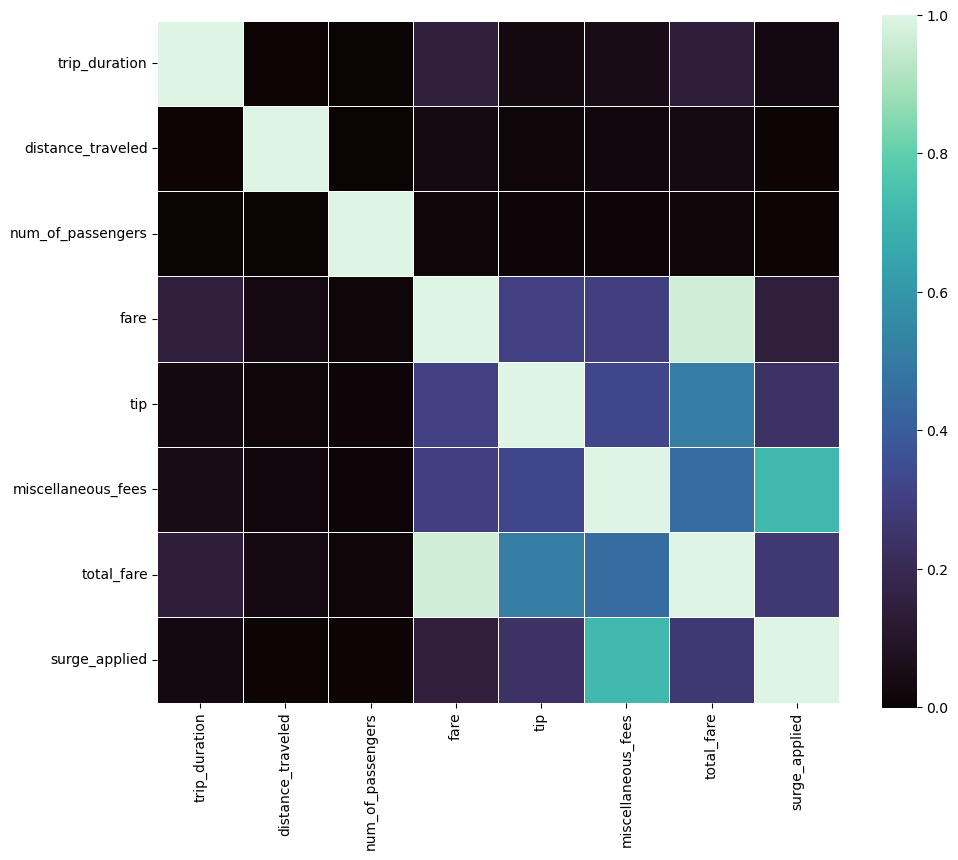

In [9]:
# Estudiamos la correlación

corr= df_taxi1.corr()

f,ax, = plt.subplots(figsize=(11,9))

sns.heatmap(corr, cmap='mako', square=True, linewidths=.5)

### Prepocesamiento de datos
#### Selección de datos

In [10]:
# Definimos variables puestas a estudio

X = df_taxi1[['fare','tip']] 
Y = df_taxi1['total_fare'] 


#### Visualización de los datos

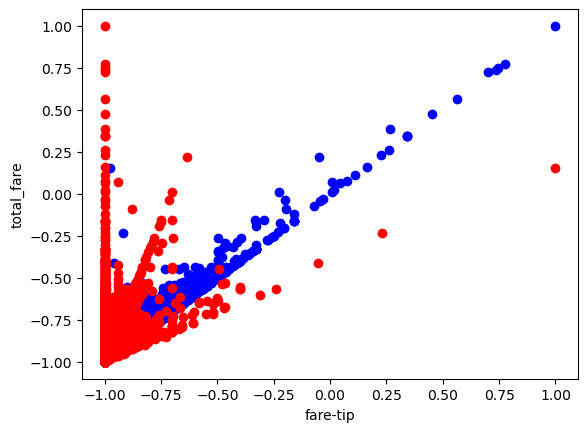

In [11]:
# Visualizamos los datos

plt.scatter(X['fare'], Y, color='blue', label='Variable 1')
plt.scatter(X['tip'], Y, color='red', label='Variable 2')
plt.xlabel('fare-tip')
plt.ylabel('total_fare')
plt.show()

#### División del conjunto de datos

In [12]:
# Conjunto de entrenamiento (Conjunto de desarrollo + conjunto de validación), conjunto de prueba

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state= 1)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)

In [13]:
X_train.shape

(125778, 2)

In [14]:
X_test.shape

(41927, 2)

In [15]:
X_val.shape

(41927, 2)

## Creación del modelo de Regresión Lineal

In [16]:
# Creación del modelo

lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento

lr.fit(X_train,y_train,)

LinearRegression()

## Predicción del conjunto de datos de validación

In [17]:
y_pred = lr.predict(X_val)

## Validación de resultados

In [18]:

print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "fare":', lr.coef_[0])
print('Valor de la pendiente o coeficiente "tip":', lr.coef_[1])
print('Valor de la intersección o coeficiente "b":', lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y =', lr.intercept_,'+',lr.coef_[0],'TotalBsmtSF','+',lr.coef_[1],'OverallQual')

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "fare": 1.030455321055022
Valor de la pendiente o coeficiente "tip": 0.649349523825135
Valor de la intersección o coeficiente "b": 0.6842269985098065

La ecuación del modelo es igual a:
y = 0.6842269985098065 + 1.030455321055022 TotalBsmtSF + 0.649349523825135 OverallQual


### Métricas

In [19]:
print('Raíz del error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiente de determinación; %.2f' % r2_score(y_val, y_pred))

Raíz del error cuadrático medio: 0.01
Coeficiente de determinación; 0.99


### Predicción de datos futuros

In [20]:
y_pred = lr.predict(X_test)

In [21]:
print('Raíz del error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación; %.2f' % r2_score(y_test, y_pred))

Raíz del error cuadrático medio: 0.01
Coeficiente de determinación; 0.99


## Aplicamos Árbol de Decisión(Regresión)

### Preprocesamiento de datos 
### Seleccion de datos

In [22]:
df_taxi1.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,-0.982706,-0.999905,-0.777778,-0.966415,-0.9808,-0.968772,-0.952910,-1.0
1,-0.972542,-0.999881,-0.777778,-0.952981,-0.9808,-0.937084,-0.936408,-1.0
2,-0.983122,-0.999892,-0.777778,-0.968094,-1.0000,-0.875431,-0.956230,1.0
3,-0.984488,-0.999804,-0.333333,-0.959698,-1.0000,-0.952928,-0.955392,-1.0
4,-0.992406,-0.999928,-0.777778,-0.979849,-0.9904,-0.937084,-0.968606,-1.0


### Eliminación de datos atípicos

In [23]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_taxi1['trip_duration'].quantile(0.25)
Q3 = df_taxi1['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para determinar los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar el DataFrame y eliminar los outliers
df_taxi1 =  df_taxi1[(df_taxi1['trip_duration'] >= lower_limit) & (df_taxi1['trip_duration'] <= upper_limit)]
df_taxi1.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,-0.982706,-0.999905,-0.777778,-0.966415,-0.9808,-0.968772,-0.952910,-1.0
1,-0.972542,-0.999881,-0.777778,-0.952981,-0.9808,-0.937084,-0.936408,-1.0
2,-0.983122,-0.999892,-0.777778,-0.968094,-1.0000,-0.875431,-0.956230,1.0
3,-0.984488,-0.999804,-0.333333,-0.959698,-1.0000,-0.952928,-0.955392,-1.0
4,-0.992406,-0.999928,-0.777778,-0.979849,-0.9904,-0.937084,-0.968606,-1.0


In [24]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_taxi1['distance_traveled'].quantile(0.25)
Q3 = df_taxi1['distance_traveled'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para determinar los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar el DataFrame y eliminar los outliers
df_taxi1 =  df_taxi1[(df_taxi1['distance_traveled'] >= lower_limit) & (df_taxi1['distance_traveled'] <= upper_limit)]
df_taxi1.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,-0.982706,-0.999905,-0.777778,-0.966415,-0.9808,-0.968772,-0.952910,-1.0
1,-0.972542,-0.999881,-0.777778,-0.952981,-0.9808,-0.937084,-0.936408,-1.0
2,-0.983122,-0.999892,-0.777778,-0.968094,-1.0000,-0.875431,-0.956230,1.0
3,-0.984488,-0.999804,-0.333333,-0.959698,-1.0000,-0.952928,-0.955392,-1.0
4,-0.992406,-0.999928,-0.777778,-0.979849,-0.9904,-0.937084,-0.968606,-1.0


In [25]:
# Seleccionamos las características a tener en cuenta para crear el modelo

X = df_taxi1[['trip_duration', 'distance_traveled']]
y = df_taxi1['total_fare']

#### División de datos (conjuntos de entrenamiento y de prueba)

In [26]:
# Dividimos los datos, 80% para entrenamiento y 20% para la prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Conjunto de desarrollo, conjunto de validación

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state= 1)

### Creación del modelo de regresión

In [27]:
reg = DecisionTreeRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

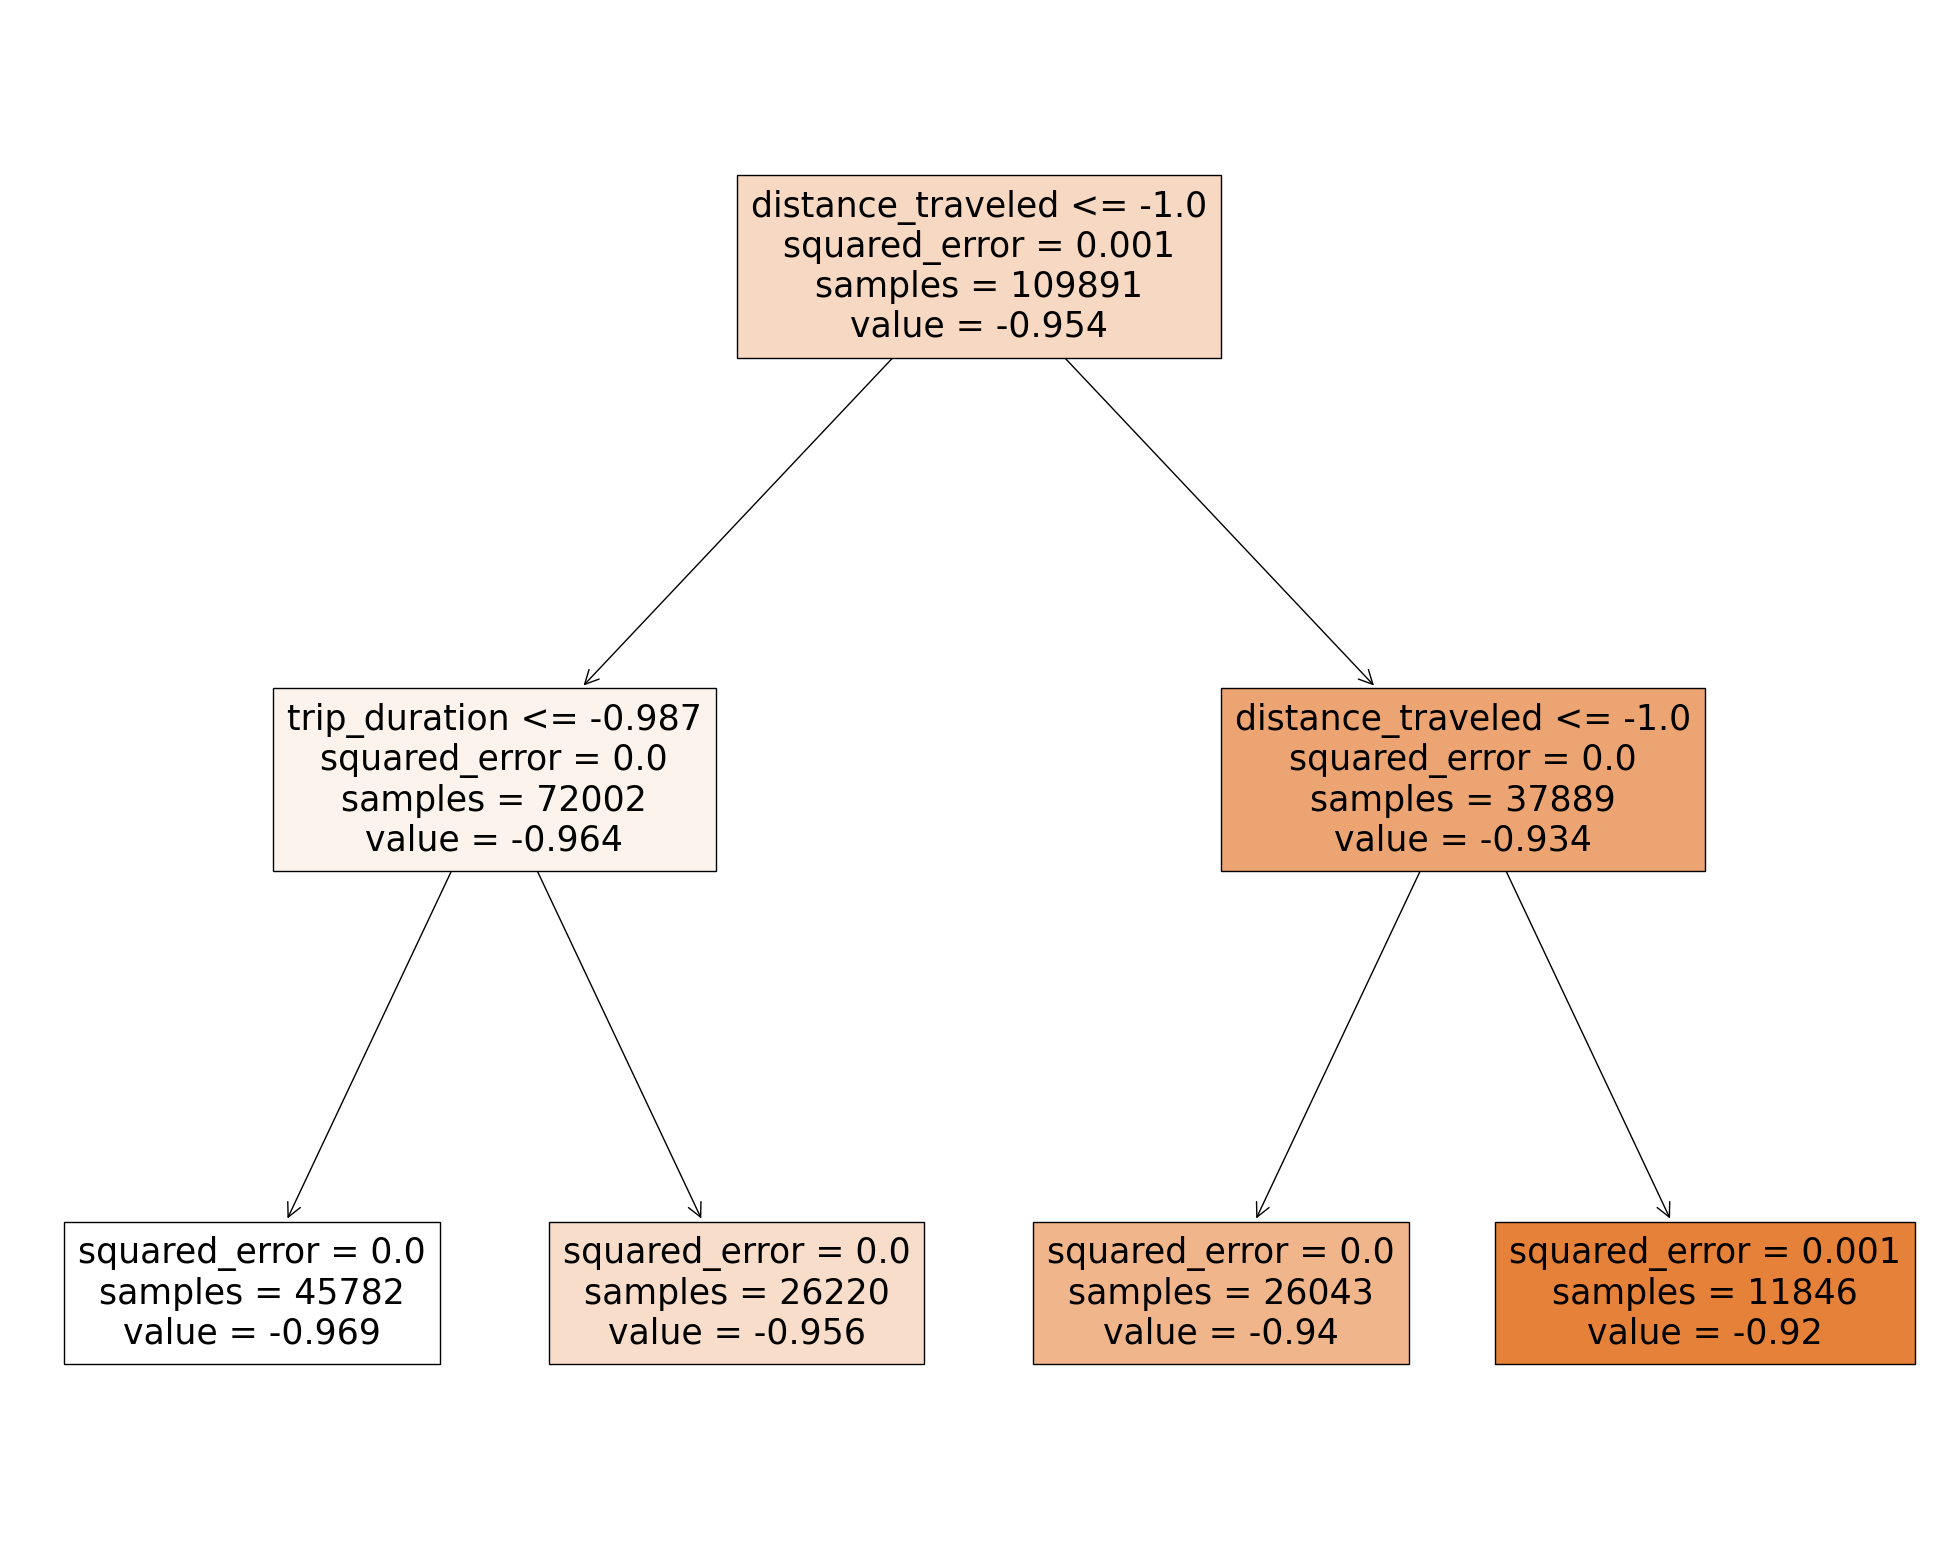

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names= X.columns, filled=True)

### Prediccion del conjunto de datos de validación

In [29]:
y_pred = reg.predict(X_val)

In [30]:
print('Raiz del error cuadrático medio %.2f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coeficiewnte de determinación %.2f' % r2_score(y_val, y_pred))

Raiz del error cuadrático medio 0.02
Coeficiewnte de determinación 0.44


### Prediccion del conjunto de datos de prueba

In [31]:
y_pred = reg.predict(X_test)

In [32]:
print('Raiz del error cuadrático medio %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación %.2f' % r2_score(y_test, y_pred))

Raiz del error cuadrático medio 0.02
Coeficiente de determinación 0.45


## Conclusión

Para este conjuno de datos he buscado primero la existencia de datos nulos, ceros y negativos. No he encontrado nulos en la tabla, pero si que he encontrado algunos ceros en gran parte de las columnas, los cuales he ido eliminando. Con lo que respecta a los negativos, si que existen en la tabla pero pueden deberse a descuentos que ha hecho el taxista, por lo que no los he eliminado.
He aplicado el modelo de regresión lineal con las variables 'miscellaneous_fees' y 'tip' pero me ha salido un porcentaje muy bajo, por lo que las he modificado a Fare y Tip, las cuales me han dado un porcentaje de fiabilidad altísimo.
En segundo lugar, he aplicado el Árbol de Decisión de Regresión con las variables que has comentado en clase, pero por más que lo he intentado no he conseguido que superara el 45%. He eliminado los elementos atípicos, y aun así me sigue saliendo un porcentaje muy bajo.
